# NLTK Chapter 5

## Categorizing and Tagging Words

*The html version of this chapter in the NLTK book is available [here](https://www.nltk.org/book/ch05.html#exercises "Ch05 Exercises").*

### 5.10   Exercises

##### 1.

☼ Search the web for "spoof newspaper headlines", to find such gems as: *British Left Waffles on Falkland Islands*, and *Juvenile Court to Try Shooting Defendant*. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

*No, the ambiguity is not necessarily removed.  For example, in __"Drunk Gets Nine Months in Violin Case"__, the ambiguity concerns the two senses of the word "Case", which are both nouns.  Likewise with the headline __"Miners Refuse to Work after Death"__, where the two senses of "Death" are also nouns.*  

##### 2.

☼ Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. *contest*); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.

*I'm just playing against myself.  I took a list of words from [this page](https://www.businessenglishresources.com/learn-english-for-business/teachers-section/mini-lessons/pronunciation-lessons-pronunciation-changes-in-words-that-are-both-nouns-and-verbs/ "words that are both nouns and verbs"), and manually sorted them into two lists: one for words I thought were more likely to be nouns, and one for words I thought were more likely to be verbs.  I then devised code which programmatically check this for me:*

In [1]:
import nltk

In [3]:
btw = nltk.corpus.brown.tagged_words()
cfd = nltk.ConditionalFreqDist(btw)
likely_nouns = ["conduct", "combat", "conflict", "contest", "contract", 
                "impact", "insult", "object", "present", "progress", "project",
                "rebel", "refill", "refund", "subject"]

[('NN', 19), ('VB', 16)]

In [11]:
sum([cfd[ln].most_common()[0][0] == 'NN' for ln in likely_nouns])/len(likely_nouns)

0.8666666666666667

In [13]:
[(ln, cfd[ln].most_common()) for ln in likely_nouns if cfd[ln].most_common()[0][0] != 'NN']

[('present', [('JJ', 220), ('RB', 63), ('NN', 44), ('VB', 39), ('AP', 4)]),
 ('refill', [('VB', 1)])]

In [17]:
nltk.help.brown_tagset('JJ')

JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...


*I neglected to consider that 'present' can also be an adjective.  I was also suprised that 'refill' was only in the corpus once, which may be an artifact of the corpus's age, as soft drink fountains weren't as ubiquitous 50 years ago.*

*Trying the same with the words I suspect are more common as verbs:*

In [6]:
dual_meaning = ["conduct", "attribute", "combat", "conflict", "contest", 
                "contract", "decrease", "escort", "impact", "increase", 
                "insult", "object", "permit", "present", "proceed", "progress",
                "project", "rebel", "refill", "refund", "reject", "repeat", 
                "subject", "suspect"]
likely_verbs = [dm for dm in dual_meaning if dm not in likely_nouns]

In [22]:
sum([cfd[lv].most_common()[0][0] == 'VB' for lv in likely_verbs])/len(likely_verbs)

0.6666666666666666

In [24]:
[(lv, cfd[lv].most_common()) for lv in likely_verbs if cfd[lv].most_common()[0][0] != 'VB']

[('attribute', [('NN', 4), ('VB', 2)]),
 ('escort', [('NN', 5), ('VB', 4)]),
 ('increase', [('NN', 112), ('VB', 81), ('VB-HL', 1)])]

##### 3. 

☼ Tokenize and tag the following sentence: *They wind back the clock, while we chase after the wind.* What different pronunciations and parts of speech are involved?

*Using the universal tagset.  A good description thereof can be found [here](https://universaldependencies.org/u/pos/ "Universal Tagset"):*

They|PRON wind|VERB back|ADP the|DET clock|NOUN ,|PUNCT while|CCONJ we|PRON chase|VERB after|ADP the|DET wind|NOUN .|PUNCT

*The only homonyms that could be pronounced differently are wind|VERB __/ˈwaɪnd/__ and wind|NOUN __/ˈwɪnd/__.*

##### 4. 

☼ Review the mappings in [3.1](https://www.nltk.org/book/ch05.html#tab-linguistic-objects). Discuss any other examples of mappings you can think of. What type of information do they map from and to?

*A phone book maps from names to phone numbers;  A map maps from GPS coordinates to a physical location;  A schedule maps from times to events; etc...*

#### 5.

☼ Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary `d`, and add some entries. What happens if you try to access a non-existent entry, e.g. `d['xyz']`?


In [30]:
d = {'123': 'easy as', 'DoReMi': 'simple as', 'abc': 'baby, you and me girl'}

*Looking up a non-existent key will throw an error:*

```
d['xyz']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-27-eff1decdc6c9> in <module>
----> 1 d['xyz']

KeyError: 'xyz'
    
```

##### 6.

☼ Try deleting an element from a dictionary `d`, using the syntax `del d['abc']`. Check that the item was deleted.

In [31]:
d['abc']

'baby, you and me girl'

In [32]:
del d['abc']

```
d['abc']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-29-d1565fe7f927> in <module>
----> 1 d['abc']

KeyError: 'abc'
    
```

##### 7.

☼ Create two dictionaries, `d1` and `d2`, and add some entries to each. Now issue the command `d1.update(d2)`. What did this do? What might it be useful for?

In [33]:
d1 = {'do': 'a deer, a female deer', 're': 'a drop of golden sun'}
d2 = {'mi': 'a name I call myself', 'fa': 'a long, long way to run'}

In [34]:
d1.update(d2)
d1

{'do': 'a deer, a female deer',
 're': 'a drop of golden sun',
 'mi': 'a name I call myself',
 'fa': 'a long, long way to run'}

*It concatenated the dictionaries.  It's useful for updating dictionaries without having to redefine them.*

##### 8. 

☼ Create a dictionary `e`, to represent a single lexical entry for some word of your choice. Define keys like `headword`, `part-of-speech`, `sense`, and `example`, and assign them suitable values.

In [39]:
# winklepicker

e = {'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
  'part-of-speech': 'Noun', 
  'sense': 'type of footwear', 
  'example': 'Winklepickers were very popular among mods in the 60s.'}

In [40]:
e

{'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
 'part-of-speech': 'Noun',
 'sense': 'type of footwear',
 'example': 'Winklepickers were very popular among mods in the 60s.'}

##### 9. 

☼ Satisfy yourself that there are restrictions on the distribution of *go* and *went*, in the sense that they cannot be freely interchanged in the kinds of contexts illustrated in ([3d](https://www.nltk.org/book/ch05.html#ex-go)) in [7](https://www.nltk.org/book/ch05.html#sec-how-to-determine-the-category-of-a-word).

<i>'Go' cannot be replaced by 'went' when used in the imperative mood (e.g., "*Please went.", or when referring to future events (e.g., "*They will went to the festival tomorrow.").  'Went' cannot be replaced by 'go' for the 3rd person: "*He go to school in the morning."</i>

##### 10. 

☼ Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [42]:
from nltk.corpus import brown
unigram_tagger = nltk.UnigramTagger(brown.tagged_sents())

In [46]:
test = "this shouldn't be too difficult"
unigram_tagger.tag(test.split())

[('this', 'DT'),
 ("shouldn't", 'MD*'),
 ('be', 'BE'),
 ('too', 'QL'),
 ('difficult', 'JJ')]

In [47]:
test2 = """
        this should be a bit more of a challenge, 
        as they didn't have blogs when the corpus
        was compiled
        """
unigram_tagger.tag(test2.split())

[('this', 'DT'),
 ('should', 'MD'),
 ('be', 'BE'),
 ('a', 'AT'),
 ('bit', 'NN'),
 ('more', 'QL'),
 ('of', 'IN'),
 ('a', 'AT'),
 ('challenge,', None),
 ('as', 'CS'),
 ('they', 'PPSS'),
 ("didn't", 'DOD*'),
 ('have', 'HV'),
 ('blogs', None),
 ('when', 'WRB'),
 ('the', 'AT'),
 ('corpus', 'NN'),
 ('was', 'BEDZ'),
 ('compiled', 'VBN')]

*I expected that the word 'blog' would be tagged with `None`, as I was certain it wouldn't have appeared in the Brown Corpus.  But I was surprised to see that 'challenge' was also tagged with `None`.  I tried to do a little investigating into this, but wasn't able to come up with a satisfactory answer.  I suspected it may have had something to do with the fact that challenge can be either a noun or a verb, but other words with this quality don't seem to be tagged with `None`.*

In [62]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words())
cfd['challenge']

FreqDist({'NN': 21, 'VB': 14})

In [63]:
cfd['escort']

FreqDist({'NN': 5, 'VB': 4})

In [61]:
test3 = 'what about the word escort'
unigram_tagger.tag(test3.split())

[('what', 'WDT'),
 ('about', 'IN'),
 ('the', 'AT'),
 ('word', 'NN'),
 ('escort', 'NN')]

##### 11.

☼ Learn about the affix tagger (type `help(nltk.AffixTagger)`). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [64]:
help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

*Creating and calling a number of taggers will soon create an illegible mess, so I'm adapting some code from earlier this chapter to make a graph of affix taggers, using affix lengths from -5 to 5:*

In [231]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt
import numpy as np

brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

def performance(affix_size):
    affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length = affix_size)
    return affix_tagger.evaluate(brown_tagged_sents)

def display():
    sizes = np.arange(-5, 6)
    perfs = [performance(size) for size in sizes]
    plt.plot(sizes, perfs, '-bo')
    plt.title('Affix Tagger Performance with Varying Affix Length')
    plt.xlabel('Affix Length')
    plt.ylabel('Performance')
    plt.show()

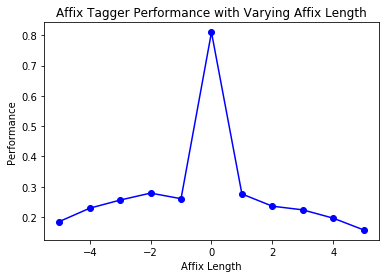

In [75]:
display()

*As you can see, the most accurate length by far is 0, suggesting that the affix tagger is not very effective (at least in English).  If we were to use it, an affix length of -2 appears to be slightly more effective than other lengths.*

##### 12. 

☼ Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?

In [80]:
size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(train_sents)

0.7884137382485832

In [81]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

*It drops precipitously when it sees new data.  As was covered in the chapter, bigrams depend entirely on the tag of the first word in the bigram.  If the tag for the first word is `None`, then the tags for all subsequent words will also be `None`.*

##### 13.

☼ We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings  and use this method to display today's date in two different formats.

*The link in the book is dead.*

In [94]:
date = {'month': '11', 'date': '06', 'day': 'Wednesday', 'year': '2019'}

print("European style: {}, {}.{}.{}".format(date['day'], date['date'], 
                                            date['month'], date['year']))
print("American style: {}, {}/{}/{}".format(date['day'], date['month'],
                                            date['date'], date['year']))
print("Asian style: {}, {}.{}.{}".format(date['day'], date['year'],
                                         date['month'], date['date']))

European style: Wednesday, 06.11.2019
American style: Wednesday, 11/06/2019
Asian style: Wednesday, 2019.11.06


##### 14.

◑ Use `sorted()` and `set()` to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [101]:
print(sorted(set([t for (_, t) in brown.tagged_words()])), end = '')

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', '*-NC', '*-TL', ',', ',-HL', ',-NC', ',-TL', '--', '---HL', '.', '.-HL', '.-NC', '.-TL', ':', ':-HL', ':-TL', 'ABL', 'ABN', 'ABN-HL', 'ABN-NC', 'ABN-TL', 'ABX', 'AP', 'AP$', 'AP+AP-NC', 'AP-HL', 'AP-NC', 'AP-TL', 'AT', 'AT-HL', 'AT-NC', 'AT-TL', 'AT-TL-HL', 'BE', 'BE-HL', 'BE-TL', 'BED', 'BED*', 'BED-NC', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEDZ-NC', 'BEG', 'BEM', 'BEM*', 'BEM-NC', 'BEN', 'BEN-TL', 'BER', 'BER*', 'BER*-NC', 'BER-HL', 'BER-NC', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'BEZ-NC', 'BEZ-TL', 'CC', 'CC-HL', 'CC-NC', 'CC-TL', 'CC-TL-HL', 'CD', 'CD$', 'CD-HL', 'CD-NC', 'CD-TL', 'CD-TL-HL', 'CS', 'CS-HL', 'CS-NC', 'CS-TL', 'DO', 'DO*', 'DO*-HL', 'DO+PPSS', 'DO-HL', 'DO-NC', 'DO-TL', 'DOD', 'DOD*', 'DOD*-TL', 'DOD-NC', 'DOZ', 'DOZ*', 'DOZ*-TL', 'DOZ-HL', 'DOZ-TL', 'DT', 'DT$', 'DT+BEZ', 'DT+BEZ-NC', 'DT+MD', 'DT-HL', 'DT-NC', 'DT-TL', 'DTI', 'DTI-HL', 'DTI-TL', 'DTS', 'DTS+BEZ', 'DTS-HL', 'DTX', 'EX', 'EX+BEZ', 'EX+HVD', 'EX+HVZ', 'EX+MD', '

##### 15.

Write programs to process the Brown Corpus and find answers to the following questions:

* 1. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)

* 2. Which word has the greatest number of distinct tags. What are they, and what do they represent?

* 3. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

* 4. Which tags are nouns most commonly found after? What do these tags represent?

*Part 1:*

In [136]:
# create set of all singular nouns in the Brown Corpus

sing_nouns = set(word.lower() for (word, tag) in \
                              nltk.corpus.brown.tagged_words() \
                              if tag == 'NN')

In [137]:
# create set of all plural nouns in the Brown Corpus

plur_nouns = set([word.lower() for (word, tag) in nltk.corpus.brown.tagged_words() if tag == 'NNS'])


In [138]:
# make a list of words that have regular plurals represented in plur_nouns

cands = [n for n in sing_nouns if n + "s" in plur_nouns]

In [146]:
# get FreqDist for singular nouns
snfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in sing_nouns)

In [147]:
# get FreqDist for plural nouns
pnfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in plur_nouns)

In [150]:
# find out which words are more common in the plural form
more_common_plur = [(pnfd[c + 's'], c + 's', snfd[c], c) for c in cands \
                    if pnfd[c + 's'] > snfd[c]]

In [149]:
sorted(more_common_plur, reverse = True)[:20]

[(943, 'years', 649, 'year'),
 (391, 'eyes', 119, 'eye'),
 (361, 'things', 331, 'thing'),
 (312, 'members', 133, 'member'),
 (291, 'means', 199, 'mean'),
 (269, 'words', 261, 'word'),
 (204, 'students', 109, 'student'),
 (193, 'minutes', 54, 'minute'),
 (188, 'months', 130, 'month'),
 (179, 'conditions', 89, 'condition'),
 (173, 'hours', 145, 'hour'),
 (169, 'miles', 42, 'mile'),
 (160, 'terms', 79, 'term'),
 (150, 'friends', 125, 'friend'),
 (138, 'methods', 137, 'method'),
 (125, 'sales', 44, 'sale'),
 (115, 'arms', 91, 'arm'),
 (106, 'leaders', 69, 'leader'),
 (103, 'elements', 52, 'element'),
 (102, 'factors', 71, 'factor')]

*Part 2:*

In [198]:
from collections import defaultdict

# create a ConditionalFreqDist with all the words in the corpus,
# with counts of each of their tags
dt = nltk.ConditionalFreqDist(brown.tagged_words())

# create a dictionary where the keys will be the number of distinct tags
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)

In [199]:
# word with the most tags
max(tags)

12

In [200]:
tags[12]

['that']

*For the lower numbers, the values should be a list of distinct words.  Let's make sure that's the case:*

In [202]:
print(tags[7], end = '')

['well', 'Chinese', 'Little', 'I', 'for', 'fit', 'That', 'home', 'Long', 'out', 'as', 'it']

*Looking at the tags for 'that':*

In [208]:
dt['that']

FreqDist({'CS': 6419, 'DT': 1975, 'WPS': 1638, 'WPO': 135, 'QL': 54, 'DT-NC': 6, 'WPS-NC': 3, 'CS-NC': 2, 'WPS-HL': 2, 'CS-HL': 1, ...})

*Finding out what each of those tags means:*

In [207]:
for tag in dt['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
DT: determiner/pronoun, singular
    this each another that 'nother
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
WPO: WH-pronoun, accusative
    whom that who
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.


*Interestingly, over half of the tags have no description in the documentation. After a little research, I found that -NC designates a cited word; -HL designates a headline; and -TL designates a title.  If we eliminate these tags (since a conjunction in an article and a conjunction in a title are essentially the same thing), which get considerably differenct counts:*

In [97]:
import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]

In [98]:
# using the same methods as above

dt2 = nltk.ConditionalFreqDist(bts_copy)
tags2 = defaultdict(list)
for w in set(w.lower() for w in brown.words()):
    tags2[len(dt2[w])].append(w)
    
max(tags2)

6

In [99]:
tags2[6]

['well', ':', 'still', 'beat', 'that']

In [100]:
dt2['that']

FreqDist({'CS': 6422, 'DT': 1981, 'WPS': 1643, 'WPO': 136, 'QL': 54, 'NIL': 1})

In [101]:
for tag in dt2['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
DT: determiner/pronoun, singular
    this each another that 'nother
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
WPO: WH-pronoun, accusative
    whom that who
No matching tags found.


*Part 3:*

In [270]:
tags = [tags for _, tags in brown.tagged_words()]

ft = nltk.FreqDist(tags)

In [271]:
print(ft.most_common(100), end = '')

[('NN', 152470), ('IN', 120557), ('AT', 97959), ('JJ', 64028), ('.', 60638), (',', 58156), ('NNS', 55110), ('CC', 37718), ('RB', 36464), ('NP', 34476), ('VB', 33693), ('VBN', 29186), ('VBD', 26167), ('CS', 22143), ('PPS', 18253), ('VBG', 17893), ('PP$', 16872), ('TO', 14918), ('PPSS', 13802), ('CD', 13510), ('NN-TL', 13372), ('MD', 12431), ('PPO', 11181), ('BEZ', 10066), ('BEDZ', 9806), ('AP', 9522), ('DT', 8957), ('``', 8837), ("''", 8789), ('QL', 8735), ('VBZ', 7373), ('BE', 6360), ('RP', 6009), ('WDT', 5539), ('HVD', 4895), ('*', 4603), ('WRB', 4509), ('BER', 4379), ('JJ-TL', 4107), ('NP-TL', 4019), ('HV', 3928), ('WPS', 3924), ('--', 3405), ('BED', 3282), ('ABN', 3010), ('DTI', 2921), ('PN', 2573), ('NP$', 2565), ('BEN', 2470), ('DTS', 2435), ('HVZ', 2433), (')', 2273), ('(', 2264), ('NNS-TL', 2226), ('EX', 2164), ('JJR', 1958), ('OD', 1935), ('NR', 1566), (':', 1558), ('NN$', 1480), ('IN-TL', 1477), ('NN-HL', 1471), ('DO', 1353), ('NPS', 1275), ('PPL', 1233), ('RBR', 1182), ('DOD'

In [253]:
for tag, _ in ft.most_common(20):
    nltk.help.brown_tagset(tag)

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
.: sentence terminator
    . ? ; ! :
,: comma
    ,
NNS: noun, plural, common
    irregularities presentments thanks reports voters laws legislators
    years areas adjustments chambers $100 bonds courts sales details raises
    sessions members congressmen votes polls calls ...
CC

*Part 4:*

In [257]:
wtp = nltk.bigrams(brown.tagged_words())
np = [a[1] for (a, b) in wtp if b[1].startswith('NN')]
fd = nltk.FreqDist(np)
prec_tags = [tag for (tag, _) in fd.most_common(20)]
print(prec_tags, end = '')

['AT', 'JJ', 'IN', 'NN', 'PP$', 'CC', 'CD', 'AP', 'DT', 'VBG', ',', 'VBN', '.', 'NN-TL', 'JJ-TL', 'VB', 'NP', 'NP-TL', 'CS', 'NP$']

In [259]:
for tag in prec_tags:
    nltk.help.brown_tagset(tag)

AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
PP$: determiner, possessive
    our its his their my your her out thy mine thine
CC: conjunction, coordinating
    and or but plus & either neither nor yet 'n' and/or minus an'
CD: numeral, cardinal
    two one 1 four 2 1913 71 74 637 1937 8 five three million 87-31 29-5
    seven 

##### 16. 

◑ Explore the following issues that arise in connection with the lookup tagger:

* a. What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?

* b. Consider the curve in [4.2](https://www.nltk.org/book/ch05.html#fig-tag-lookup); suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import brown

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt)
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def performance_w_bo(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, 
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    perfs_bo = [performance_w_bo(cfd, words_by_freq[:size]) for size in sizes]
    plt.plot(sizes, perfs, '-bo', label = 'without backoff')
    plt.plot(sizes, perfs_bo, '--ro', label = 'with backoff')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.legend(loc = 'lower right')
    plt.show()

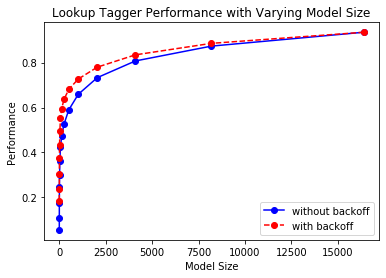

In [18]:
display()

* <i>a. The performance with or without backoff is quite similar. Both taggers plateau at a model size of about 4,000 words and top out at the same location at just over 16,000 words, though the curve is shallower without backoff.  Naturally, the tagger tends to perform better with backoff.</i>

* <i>b. A good size would be around 4,000 words.  The balance between memory and performance is not as acute today in the era of big data, where machines with multi-GB RAM and processors with multiple cores are the norm.  

##### 17.

◑ What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)

*It appears that the upper limit would be around 95%.  Below is code that will sum the number of words in the Brown Corpus tagged with each word's most likely tag (n.b. that I use the `.startswith()` method, because many tags have a suffix such as `-TL` or `-HL`), divided by the total number of word types in the corpus.  Notice that the limit is dependant on the corpus: the Penn Treebank has a slightly higher limit.*

In [42]:
# Brown Corpus

cfd = nltk.ConditionalFreqDist(brown.tagged_words())

sum([tag.startswith(cfd[word].max()) for word, tag in \
     brown.tagged_words()]) / len(brown.tagged_words())

0.9360054151251472

In [50]:
# Penn Treebank

wsj = nltk.corpus.treebank.tagged_words()
cfd = nltk.ConditionalFreqDist(wsj)
sum([tag == cfd[word].max() for word, tag in wsj]) / len(wsj)

0.9599705987524335

##### 18.

◑ Generate some statistics for tagged data to answer the following questions:

* a. What proportion of word types are always assigned the same part-of-speech tag?

* b. How many words are ambiguous, in the sense that they appear with at least two tags?

* c. What percentage of word _tokens_ in the Brown Corpus involve these ambiguous words?

*a. Getting rid of tag "suffixes".  I.e., `-HL`, `-NC`, and `-TL` suffixes applied to some tags in the Brown Corpus:*

In [65]:
import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]

In [67]:
cfd = nltk.ConditionalFreqDist(bts_copy)

*Now creating a dictionary where the keys will be the number of distinct tags:*

In [74]:
tags = defaultdict(list)
for w in set(w.lower() for w, _ in bts_copy):
    tags[len(cfd[w])].append(w)

In [78]:
one_tag = len(tags[1]); one_tag

33948

In [79]:
word_types = len(set(w.lower() for w, _ in bts_copy)); word_types

49815

In [80]:
one_tag / word_types

0.6814814814814815

*b. The number of ambiguous words is simply the number of word types minus the number of words with one tag:*

In [81]:
word_types - one_tag

15867

*c. Since dictionaries have much faster look-up times than lists, we'll create another dictionary with all the words that have more than one tag.  Then we'll simply iterate through all the words, make a tally of those with keys in the new dictionary, and divide this tally by the total number of tokens in the corpus:*

In [92]:
ambiguous = {}
for w in set(w.lower() for w, _ in bts_copy):
    if len(cfd[w]) >= 2:
        ambiguous[w] = ''
    

In [96]:
sum([w.lower() in ambiguous for w in brown.words()]) / len(brown.words())

0.5946579032580314

##### 19. 

◑ The `evaluate()` method works out how accurately the tagger performs on this text. For example, if the supplied tagged text was `[('the', 'DT'), ('dog', 'NN')]` and the tagger produced the output `[('the', 'NN'), ('dog', 'NN')]`, then the score would be `0.5`. Let's try to figure out how the evaluation method works:

* a. A tagger `t` takes a list of words as input, and produces a list of tagged words as output. However, `t.evaluate()` is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging?

* b. Once the tagger has created newly tagged text, how might the `evaluate()` method go about comparing it with the original tagged text and computing the accuracy score?

* c. Now examine the source code to see how the method is implemented. Inspect `nltk.tag.api.__file__` to discover the location of the source code, and open this file using an editor (be sure to use the `api.py` file and not the compiled `api.pyc` binary file).

*The `.evaluate()` method would need to extract the tags from the correctly tagged text and populate a list with them.  It could then create a list of tags produced by the tagger `t`, and calculate what percentage of the two lists are identical.*

*I was able to find and open `tag\api.py` without any problems.  However, examining the file wasn't very beneficial, as most of the work is done "under the hood" via a number of methods that haven't been covered: i.e., `chain`, a function from the `itertools` library that flattens and concatenates lists; and `accuracy`, a function from `nltk.metrics` that calculates what percentage of two lists are the same.*

*I'm all for examining code in more detail; but if the authors are explicitly asking us to do so, it would be more beneficial to look at functions where the bulk of the work is being done within the function, and not via outside helper functions.*

##### 20.

◑ Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:

* a. Produce an alphabetically sorted list of the distinct words tagged as `MD`.

* b. Identify words that can be plural nouns or third person singular verbs (e.g. <i>deals</i>, <i>flies</i>).

* c. Identify three-word prepositional phrases of the form IN + DET + NN (eg. <i>in the lab</i>).

* d. What is the ratio of masculine to feminine pronouns?


*a.*

In [105]:
print(sorted(set([w.lower() for w, t in brown.tagged_words() if t == 'MD'])), 
      end = '')

["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']

*b.*

In [113]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words())

In [128]:
NNS_VBZ = set([w for w in set(w.lower() for w, t in brown.tagged_words()) \
               if 'NNS' in cfd[w] and 'VBZ' in cfd[w]])

In [129]:
print(NNS_VBZ, end = '')

{'hides', 'colors', 'practices', 'covers', 'dogs', 'laps', 'approaches', 'boards', 'reports', 'markets', 'stems', 'causes', 'calls', 'pulls', 'drifts', 'gains', 'designs', 'senses', 'bridges', 'permits', 'heads', 'favors', 'surveys', 'coordinates', 'records', 'mentions', 'shows', 'gestures', 'aids', 'lapses', 'forces', 'transports', 'spans', 'phones', 'scales', 'traces', 'issues', 'demands', 'fits', 'photographs', 'hopes', 'lists', 'offers', 'says', 'banks', 'leads', 'rains', 'struggles', 'signals', 'searches', 'bores', 'crosses', 'knocks', 'lies', 'laughs', 'bargains', 'rebels', 'wants', 'casts', 'flags', 'starts', 'accounts', 'arches', 'rolls', 'blueprints', 'drinks', 'mirrors', 'flies', 'feeds', 'releases', 'tries', 'dislikes', 'piles', 'powers', 'bars', 'interests', 'tires', 'uses', 'hinges', 'contacts', 'tortures', 'treats', 'walks', 'loves', 'looms', 'files', 'guarantees', 'lags', 'projects', 'answers', 'turns', 'dreams', 'contracts', 'figures', 'censors', 'votes', 'bullies', 're

*c. The instructions for this are somewhat misleading: in the Brown Corpus, determiners and articles have different tags.  Articles (such as 'the' in the example "in the lab") would be tagged `AT`, whereas determiners (such as this, some, these, etc...) would be tagged `DT|DTI|DTS`. In any case, there is no `DET` tag in the Brown Corpus. Either the authors are trying to be tricky, or were just careless when they composed this question.*

In [151]:
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents()\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1.startswith('IN') and \
                 (t2.startswith('DT') or t2 == 'AT') and t3.startswith('NN')]

In [152]:
print(three_word_pp[:50], end = '')

[('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'the', 'law'), ('at', 'the', 'State'), ('through', 'the', 'welfare'), ('in', 'the', 'state'), ('with', 'the', 'exception'), ('of', 'this', 'money'), ('of', 'these', 'funds'), ('in', 'the', 'future'), ('in', 'the', 'appointment'), ('in', 'a', 'manner'), ('of', 'the', 'concessionaires'), ('for', 'the', 'purpose'), ('at', 'the', 'jail'), ('for', 'the', 'mayor'), ('than', 'a', 'year'), ('on', 'the', 'petition'), ('from', 'the', 'audience'), ('for', 'a', 'state'), ('of', 'the', 'voters'), ('in', 'each', 'county'), ('under', 'the', 'county'), ('for', 'some', 'time'), ('of', 'the', 'highway'), ('of', 'the', 'number'), ('in', 'the', 'session'), ('to', 'the', 'state'), ('of', 'the', 'act'), ('with', 'a', 'battle'), ('in', 'the', 'Legislature'), ('against', 'the', 'issuance'), ('about', 'the', 'plans'), ('in', 'the', '

*You could argue that authors meant we should use the `universal` tagset; but that doesn't have an `IN` tag or an `NN` tag.  We'd have to use respectively `ADP` and `NOUN`.  And this gives quite different results:*

In [196]:
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents(tagset = 'universal')\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1 == 'ADP' and t2 == 'DET' and t3 == 'NOUN']

In [198]:
print(three_word_pp[:10], end = '')

[('that', 'any', 'irregularities'), ('that', 'the', 'City'), ('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'both', 'governments')]

*d. First, we'll get a list of all the pronouns in the corpus.  There are quite a few (more than expected).  Then we'll manually pick out the masculine and feminine pronouns:*

In [167]:
[set(w.lower() for w,t in brown.tagged_words() if t.startswith('PP'))]

[{"'em",
  "'emselves",
  "'im",
  "'tain't",
  "'tis",
  'ah',
  'ahm',
  'dey',
  'em',
  "h'all",
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'hers',
  'herself',
  'him',
  'himself',
  'himselfe',
  'hir',
  'his',
  'hisself',
  'hym',
  'hymselfe',
  'hys',
  'hytt',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  'mah',
  'me',
  'mee',
  'mine',
  'my',
  'myn',
  'myne',
  'myself',
  'oneself',
  'our',
  'ours',
  'ourselves',
  'out',
  'ownself',
  'she',
  "she'd",
  "she'll",
  "she's",
  'thay',
  'thee',
  'thei',
  'their',
  "their's",
  'theirs',
  'them',
  'themselves',
  'ther',
  'they',
  "they'd",
  "they'll",
  "they're",
  "they've",
  'thine',
  'thou',
  'thum',
  'thy',
  'u',
  'um',
  'us',
  'we',
  "we'd",
  "we'll",
  "we're",
  "we'uns",
  "we've",
  'wee',
  "y'all",
  "y'know",
  "y'r",
  "y're",
  'ya',
  'ye',
  "ye're",
  'yore',
  'you',
  "you'd",
  "you'll",
  "you're",
  "you

In [179]:
m = ["he'd",  "he'll",  "he's",  "'im",  'he',  'him',  'himself',  'himselfe',  'his',  'hisself',  'hym',  'hymselfe',  'hys']
f = ["she'd",  "she'll",  "she's",  'her',  'hers',  'herself',  'hir',  'she']

*Using the ConditionalFreqDist from above, we can use the syntax below to calculate the number of occurrences for each pronoun:*

In [185]:
cfd["she'd"]

FreqDist({'PPS+MD': 28, 'PPS+HVD': 27})

In [186]:
sum(cfd["she'd"].values())

55

In [183]:
m_values = sum([sum(cfd[mp].values()) for mp in m])
f_values = sum([sum(cfd[fp].values()) for fp in f])

*From this we can calculate that male pronouns are over three times as prevalent than female pronouns in the corpus:*

In [184]:
m_values/f_values

3.2378880759343485

##### 21. 

◑ In [3.1](https://www.nltk.org/book/ch03.html#tab-absolutely) we saw a table involving frequency counts for the verbs *adore*, *love*, *like*, *prefer* and preceding qualifiers *absolutely* and *definitely*. Investigate the full range of adverbs that appear before these four verbs.

In [202]:
wtp = nltk.bigrams(brown.tagged_words())
vp = sorted(set([a[0] for (a, b) in wtp if a[1].startswith('RB') and b[0] in\
     ('adore', 'love', 'like', 'prefer')]))

In [203]:
print(vp, end = '')

['Jist', 'Just', 'Kinda', 'More', 'abreast', 'almost', 'alone', 'always', 'around', 'by', 'close', 'dearly', 'deceptively', 'even', 'exactly', 'generally', 'gloriously', 'here', 'increasingly', 'jist', 'just', 'less', 'more', 'much', 'often', 'particularly', 'quick', 'rather', 'remarkably', 'roughly', 'simply', 'so', 'somewhat', 'spontaneously', 'sure', 'there', 'together', 'wildly', 'yet']

##### 22.

◑ We defined the `regexp_tagger` that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with *-s* as a plural noun. Define a regular expression tagger (using `RegexpTagger()`) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)

*In section 4.2, we made a `regexp_tagger` that can do a lot more than just check for cardinal numbers.  I have to ask again if the person who authored this question bothered to read the chapter...*

*As I mentioned in the notes for this chapter, using regular expressions as the main tagging method is not recommended, as there are so many exceptions.  But for the sake of practice:*


In [235]:
# adapted from my notes for 4.2

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds 
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs
    
    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),
    
    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

In [236]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown.sents(categories = 'news')[3]), end = '')

[('``', '.'), ('Only', 'ADV'), ('a', 'DET'), ('relative', 'JJ'), ('handful', 'JJ'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", '.'), (',', '.'), ('the', 'DET'), ('jury', 'JJ'), ('said', 'NN'), (',', '.'), ('``', '.'), ('considering', 'VBG'), ('the', 'DET'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'DET'), ('election', 'NN'), (',', '.'), ('the', 'DET'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'DET'), ('size', 'VB'), ('of', 'NN'), ('this', 'NNS'), ('city', 'JJ'), ("''", '.'), ('.', '.')]

In [237]:
regexp_tagger.evaluate(brown.tagged_sents(categories = 'news'))

0.23470970821648068

*As I thought, the tagger didn't perform especially well.  For what it's worth, the one class of words with the most distinguishable suffixes is nouns; but since that's the default class, there's no point in crafting regular expressions to isolate them.*

##### 23.

◑ Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its `accuracy()` method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?

*This question is very confusingly written.  By the previous section, do they mean the previous question?  Also, there is no `accuracy()` method for taggers: there is an `evaluate()` method, which uses the `accuracy()` method from nltk.metrics.  Furthermore, I think using regular expressions for tagging is extremely ineffective, as I have noted several times.  The only thing I want to add to this answer is that `evaluate()` does provide an objective metric that we can use to verify that one tagger is more effective than another, so we don't have to rely on hunches.*

##### 24. 

◑ How serious is the sparse data problem? Investigate the performance of n-gram taggers as *n* increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of $10^5$ and a tagset size of $10^2$.

*The maximum number of possible $n$-grams and possible tag combinations would increase exponentially with the increase in the size of $n$.  In most languages, rules of syntax prohibit a good number of possible combinations (e.g., in English an adjective can't precede an article, etc...); but in any case, the number of possible combinations is so large that we would almost surely never see the vast majority of possible $n$-grams.*


| $n$ =  | Maximum Number of Possible n-grams | Maximum Number of Possible tag combinations |
|:------:|:----------------------------------:|:-------------------------------------------:|
|    1   |               $10^5$               |                    $10^2$                   |
|    2   |               $10^{10}$              |                    $10^4$                   |
|    3   |               $10^{15}$              |                    $10^6$                   |
|    4   |               $10^{20}$              |                    $10^8$                   |
|    5   |               $10^{25}$              |                   $10^{10}$                   |
|    6   |               $10^{30}$              |                   $10^{12}$                   |

*The authors haven't offered much guidance in the amount of training data needed for a tagger.  Usually, anywhere between 90% of the data is used for training and 10% for testing (70/20/10 if a cross-validation model is used to tune parameters), so one could argue that we would need a training set 90% of the size of the maximum number of possible $n$-grams.  A cursory search for corpus size heuristics online failed to generate anything of value.*

*For the sake of illustration, I decided to look at the evaluation rates for uni-, bi-, and trigrams, using various ratios of training/test data.  I started off with a 10/90 train/test split, then tried a 20/80 split, a 30/70 split, etc... As you can see, with a unigram model, the size of the split does not matter as much as it does with larger $n$-grams.  No matter what the size of the train/test split, a unigram model does quite well.  However, with larger n-grams, we do notice a steady increase in accuracy as the training set grows, though the accuracy for bigram and trigram taggers still lags far behind that of a unigram tagger:*

In [258]:
train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))

In [259]:
perfs_bi = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    bigram_tagger = nltk.BigramTagger(train_sents)
    perfs_bi.append(bigram_tagger.evaluate(test_sents))

In [261]:
perfs_tri = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    trigram_tagger = nltk.TrigramTagger(train_sents)
    perfs_tri.append(trigram_tagger.evaluate(test_sents))

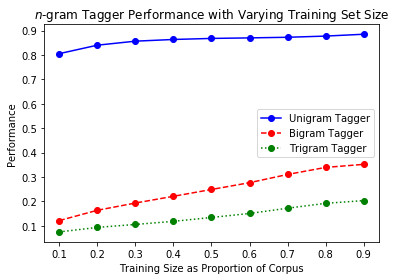

In [265]:
plt.plot(train_size, perfs_uni, '-bo', label = 'Unigram Tagger')
plt.plot(train_size, perfs_bi, '--ro', label = 'Bigram Tagger')
plt.plot(train_size, perfs_tri, ':go', label = 'Trigram Tagger')
plt.title('$n$-gram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.legend(loc = 'best')
plt.show()

*This is a very naïve assumption, but if accuracy improved at a constant rate, the bigram tagger would approach 80% if the corpus were three times as large.  Right now, the corpus has about a million tokens and 50,000 types (meaning each type appears 20 times on average), and if it were three times as large it would have 3,000,000 tokens.  If the vocabulary had 100,000 types, we could use this (very simplistic) logic to argue that we'd need a corpus of 6,000,000 tokens.*

*For the sake of comparison, I calculated the accuracy of various $n$-gram taggers using a 90/10 training/test split.  As you can see, the performance quickly falls off as we increase the number of $n$-grams.  The upshot is that we shouldn't use larger $n$-gram taggers, unless we have a very large corpus and/or a good backoff tagger.*

In [12]:
len(set(brown.words()))

56057

In [10]:
sum([len(s) for s in train_sents])

1065750

In [3]:
size = int(len(brown.tagged_sents()) * 0.9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8849353534083527

In [4]:

bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.3515747783994468

In [5]:
trigram_tagger = nltk.TrigramTagger(train_sents)
trigram_tagger.evaluate(test_sents)

0.2029714381509189

In [6]:
four_gram_tagger = nltk.tag.sequential.NgramTagger(4, train_sents)
four_gram_tagger.evaluate(test_sents)

0.15251147293644307

In [7]:
five_gram_tagger = nltk.tag.sequential.NgramTagger(5, train_sents)
five_gram_tagger.evaluate(test_sents)

0.1402003310911339

In [8]:
six_gram_tagger = nltk.tag.sequential.NgramTagger(6, train_sents)
six_gram_tagger.evaluate(test_sents)

0.1383667567737474

*But as I've mentioned repeatedly, this is a very simplistic model, and it depends greatly on the language in question.  With languages with a fixed word order (such as English), the corpus could be smaller, as rules of syntax prohibit many part of speech combinations.  However, in languages without such a fixed order, we might need a much larger corpus to encounter examples of all possible collocations.*

##### 25. 

◑ Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.

*I decided to try looking at some tagged data for Japanese.  There are two corpora available for Japanese through NLTK: the KNB and JEITA corpora.  Details on access are available [here](http://www.nltk.org/howto/japanese.html "Japanese Corpora").*

*Japanese presents a number of problems. The largest one is the writing systems.  There are four in use in modern Japanese (Kanji, Hiragana, Katakana, and Romaji; the [Wikipedia entry](https://en.wikipedia.org/wiki/Japanese_writing_system "Japanese Writing Systme") covers this in much more detail than I am able to here), and most texts use a combination of all four.  There is no concept comparable to upper- and lower-case letters; however, there are heurisitcs for when combinations of the writing systems are used (e.g., words consisting solely of Kanji are most likely nouns; most verbs and adjectives begin with a Kanji character and end with a string of Hiragana characters; etc...), so it might be possible to craft regexp taggers.  However, written Japanese does not use space between words, and I don't have much experience using regular expressions outside of the ASCII range of characters.  So for the moment, I'm going to hold off on trying to use regexp taggers.*


In [15]:
from nltk.corpus import jeita

In [18]:
print(jeita.tagged_sents()[0], end = '')

[('\u3000', '\u3000\t\u3000\t記号-空白'), ('新潟', 'ニイガタ\t新潟\t名詞-固有名詞-地域-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('停車場', 'テイシャジョウ\t停車場\t名詞-一般'), ('を', 'ヲ\tを\t助詞-格助詞-一般'), ('出る', 'デル\t出る\t動詞-自立\t一段\t基本形'), ('と', 'ト\tと\t助詞-接続助詞'), ('列車', 'レッシャ\t列車\t名詞-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('箱', 'ハコ\t箱\t名詞-一般'), ('から', 'カラ\tから\t助詞-格助詞-一般'), ('まけ', 'マケ\tまける\t動詞-自立\t一段\t連用形'), ('出さ', 'ダサ\t出す\t動詞-自立\t五段・サ行\t未然形'), ('れ', 'レ\tれる\t動詞-接尾\t一段\t連用形'), ('た', 'タ\tた\t助動詞\t特殊・タ\t基本形'), ('樣', '\t\t未知語'), ('に', 'ニ\tに\t助詞-格助詞-一般'), ('人々', 'ヒトビト\t人々\t名詞-一般'), ('は', 'ハ\tは\t助詞-係助詞'), ('ぞ', 'ゾ\tぞ\t助詞-係助詞'), ('ろ', 'ロ\tろ\t名詞-一般'), ('／', '／\t／\t記号-一般'), ('＼', '＼\t＼\t記号-一般'), ('と', 'ト\tと\t助詞-格助詞-引用'), ('一方', 'イッポウ\t一方\t名詞-非自立-副詞可能'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('向い', 'ムイ\t向く\t動詞-自立\t五段・カ行イ音便\t連用タ接続'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\t行く\t動詞-非自立\t五段・カ行促音便\t基本形'), ('。', '。\t。\t記号-句点'), ('其', '\t\t未知語'), ('あと', 'アト\tあと\t名詞-一般'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('跟', '\t\t未知語'), ('い', 'イ\tいる\t動詞-自立\t一段\t連用形'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\

*The example above shows how a sentence in Japanese is tagged.  Naturally, it's all in Japanese, so it's quite difficult for someone who can't read Japanese to make observations.  One aspect that immediately jumps out is the use of particles in Japanese.  A thorough explanation of Japanese Grammar is not possible here (a [Wikipedia artile](https://en.wikipedia.org/wiki/Japanese_grammar "Japanese Grammar") for those interested); but Japanese uses particles to mark the subject, topic, object, etc... of a sentence, and these could be of great use in tagging a text, since only certain parts of speech can be paired with specific particles.*

*I don't have time to go into the intricacies of Japanese corpora at the moment.  I was more interested in practicing importing a foreign corpus, and examining the tagging process.  Time permitting, I'll return to this at a later date.*

*I used the Jeita corpus, and started off with a unigram tagger, which took a very long time to run.  However, the accuracy was quite high: comparable to what one might expect in English:*

In [17]:
size = int(len(jeita.tagged_sents()) * 0.9)
train_sents = jeita.tagged_sents()[:size]
test_sents = jeita.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8649382697751626

*The bigram tagger, though, did much, much worse.  I'm not sure if the tagger operated on the character level, or the word level:*

In [21]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.06625315567675989

*Also surprising to me was how badly the affix tagger did.  In Japanese, a word's suffix is extremely indicative of its part of speech, so I believed an affix tagger would do quite well.  But it in fact did very poorly.  It also runs very slowly.*

In [23]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -1)
affix_tagger.evaluate(jeita.tagged_sents())

0.020517766874928366

In [20]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -2)
affix_tagger.evaluate(jeita.tagged_sents())

0.018020838870710074

In [22]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -3)
affix_tagger.evaluate(jeita.tagged_sents())

0.006691250826957604

##### 26.

◑ [4.1](https://www.nltk.org/book/ch05.html#code-baseline-tagger) plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

*I wasn't aware that this would be asked here, as I did this already in my answer for question 5.24.  For convenience's sake, I replicate the plot here.  Be aware that the plot produced by matplotlib is somewhat deceptive: the plot implies that there's a huge difference in performance between a tagger trained of 10% of a corpus and one trained on 90%; however, performance is actually uniformly good, as it's always in the 80% range for accuracy.*

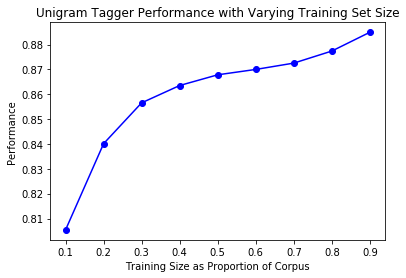

In [26]:
train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))
    
    
plt.plot(train_size, perfs_uni, '-bo')
plt.title('Unigram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.show()

##### 27. 

◑ Inspect the confusion matrix for the bigram tagger `t2` defined in [5](https://www.nltk.org/book/ch05.html#sec-n-gram-tagging), and identify one or more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.

In [155]:
size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9125751765470128

*The output for the confusion matrix example code in the book looked terrible, because the resulting table was much, much, much too large to fit on a single screen.  So to get a more legible matrix, we'll just look at a much smaller sample.  We'll have to choose ten sentences from the test set, since running `t2` on the sentences from the training set will likely generate a 100% match with the `gold_tags`, since the tagger will probably just remember the correct tags.* 

*The rows represent what the tags should be, and the columns what the tagger designated.  In the example below, two nouns were tagged as adjectives, meaning there were two `NN` false positives, and two `JJ` false negatives.*

In [216]:
test_tags = [tag for sent in brown.sents()[size:size + 10]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:size + 10] for (word, tag) in sent]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

     |                    B                                                     P                            |
     |                    E  B  B                    J        N     P  P  P  P  P              V  V  V  V    |
     |  '        A  A  B  D  E  E  C  C  C  D  I  J  J  M  N  N  N  P  P  P  P  S  Q  R  T  V  B  B  B  B  ` |
     |  '  ,  .  P  T  E  Z  R  Z  C  D  S  T  N  J  R  D  N  S  P  $  L  O  S  S  L  B  O  B  D  G  N  Z  ` |
-----+-------------------------------------------------------------------------------------------------------+
  '' | <3> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   , |  . <8> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   . |  .  .<11> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
  AP |  .  .  . <1> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
 

*It looks like someone assigned this problem as homework, as I found a solution key [here](https://gawron.sdsu.edu/compling/course_core/comp_ling_assignments/NLTK_tagging_assignment_answer.html "Tagging Assignment Answers").  The solution key included code to pull out the most common errors from the confusion matrix, which I'm including below.  There are two changes: in line 14 I replaced `<>` with `!=`; and I changed to name of the function from `foo` (which isn't very informative) to `top_cm_errors`.  The code is not all that complex, but I wasn't aware of the methods that could be used to go inside of the confusion matrix:*

In [220]:
def confusion_ct(mat, tag1, tag2):
    return mat._confusion[mat._indices[tag1]][mat._indices[tag2]]

def top_cm_errors(mat):
    conf = {}
    num_tags = len(mat._confusion)
    
    for tag1 in mat._indices:
        for tag2 in mat._indices:
            conf[(tag1, tag2)] = confusion_ct(mat, tag1, tag2)
            
    s_il = [((tag1, tag2), ct) for ((tag1, tag2), ct) in 
            sorted(conf.items(), key = lambda x:x[1], reverse = True)
            if tag1 != tag2]
    
    return s_il

In [221]:
test_tags = [tag for sent in brown.sents()[size:]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:] for (word, tag) in sent]
cm = nltk.ConfusionMatrix(gold_tags, test_tags)

In [330]:
print(top_cm_errors(cm)[:50], end = '')

[(('NP', 'NN'), 978), (('IN', 'TO'), 477), (('JJ', 'NN'), 442), (('VBD', 'VBN'), 354), (('VB', 'NN'), 314), (('NNS', 'NN'), 299), (('TO', 'IN'), 281), (('VBN', 'VBD'), 260), (('RP', 'IN'), 225), (('VBG', 'NN'), 188), (('DT', 'CS'), 175), (('NP$', 'NN'), 171), (('PPO', 'PP$'), 141), (('IN', 'RP'), 134), (('NN', 'JJ'), 130), (('CS', 'IN'), 109), (('RB', 'QL'), 105), (('PN', 'CD'), 101), (('RB', 'IN'), 97), (('PP$', 'PPO'), 96), (('RB', 'NN'), 96), (('NN', 'VB'), 95), (('VBN', 'NN'), 94), (('NN-TL', 'NN'), 92), (('QL', 'CS'), 88), (('VBD', 'NN'), 84), (('RB', 'JJ'), 81), (('WPS', 'CS'), 77), (('AP', 'JJ'), 71), (('NP-TL', 'NN'), 65), (('JJ', 'RB'), 64), (('IN', 'CS'), 62), (('PPO', 'PPSS'), 58), (('QL', 'RB'), 57), (('NP', 'NP-TL'), 56), (('IN', 'RB'), 51), (('AP', 'QL'), 50), (('RB', 'AP'), 49), (('UH', 'NN'), 48), (('NPS', 'NN'), 46), (('NN', 'VBG'), 45), (('NP-TL', 'NP'), 45), (('PPS', 'PPO'), 44), (('NNS', 'VBZ'), 42), (('FW-NN', 'NN'), 41), (('CS', 'RB'), 38), (('QL', 'ABN'), 38), ((

*It seems the most common errors are mistaking common classes (e.g., `NN`) for less common ones (e.g., `NP`).  It is definitely not recommended to collapse the more common classes together with the less common ones.  So we have to go through the list until we find some less common classes.  For a while, I was manually choosing tags that I thought might be good candidates for replacement.  But this was tedious, and I decided to try this programmatically, with much better results.  Using the frequency distribution for tag counts from the solution to question 5.15.3, I was able to write code that would determine when a less common tag was mistakenly used in place of a more common one.*

*I was also unsure how to do mapping for this problem until I came across some code [here](https://sourceforge.net/p/nltk/svn/4609/tree//trunk/nltk/doc/en/tag.txt "early NLTK text"), which almost seems to be an early version of the nltk book (it appears to have the same authors).  I had tried to create a new function that would iterate through a tagged list and replace specific tags with more general ones.  But I had no idea how to use `.evaluate` over this.  It appears that we need to collapse the tags over the training and test sets, and then train and evaluate the tagger over these edited sets.*

*Finally, I didn't know how many tags to collapse to get the best results.  My initial assumption was that more collapsed tags would lead to higher accuracy; but that wasn't the case.  I tried different numbers, and discovered than replacing the 50 most commonly mistaken tags lead to the highest level of accuracy:*

In [331]:
perf = []

# number of top_cm_errors to collapse
trials = [140, 100, 80, 60, 50, 40, 30, 20, 10, 5]

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

for trial in trials:
    
    # create a new mapping of tags to be collapsed for each trial
    new_mappings = {}

    # if the first tag (what the tag should have been) is more common 
    # than the second (how the word was mistakenly labeled), 
    # collapse the second
    for tags, errors in top_cm_errors(cm)[:trial]:
        if ft[tags[0]] > ft[tags[1]]:
            new_mappings[tags[1]] = tags[0]
            
    # training and test sets have to be re-initialized for each trial
    
    new_train_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
    new_test_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
    t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
    perf.append(t2.evaluate(new_test_sents))
    
    

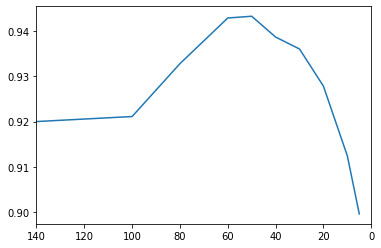

In [332]:
plt.plot(trials, perf)
plt.xlim(140, 0)
plt.show()

In [333]:
perf

[0.92000377192431,
 0.9211143940822698,
 0.9327864043083758,
 0.9428658242702375,
 0.9432534942687706,
 0.9386643196915404,
 0.9360239726745039,
 0.9278200373001404,
 0.9124284906016219,
 0.8996144255149724]

##### 28.

◑ Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.

In [2]:
from nltk.corpus import brown


size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents(tagset = 'universal')[:size]
test_sents = brown.tagged_sents(tagset = 'universal')[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9245510362314285

*Using the unmodified tagset produces an accuracy rate of 0.9125751765470128.  We could say that the accuracy rate has gone up by 1%, which seems small.  Or we could say that the rate of error has decreased by 14%, which seems much more significant:*

In [6]:
1 - (1 - 0.9245510362314285) / (1 - 0.9125751765470128) 

0.13698465963566697

*Getting tags for Brown Corpus:*

In [21]:
from nltk.data import load

tagdict = load('help/tagsets/brown_tagset.pickle')
brown_tags = [item for item in tagdict.keys()]
print(brown_tags, end = "")

['DOZ*', 'FW-AT+NP', 'NP$', 'AP$', 'VBN', 'VBD', 'VBG', 'DO+PPSS', 'WRB+BEZ', 'VBZ', 'WQL', 'WRB+IN', 'WRB+BER', 'DT', 'FW-AT+NN', 'WP$', 'DO', 'FW-UH', 'PPSS+HVD', 'RB$', 'VB', ')', 'VB+AT', 'FW-JJT', 'FW-JJR', 'AP+AP', 'VBG+TO', 'RBR', 'BER', 'WPO', 'FW-VBZ', 'PN$', 'VBN+TO', 'FW-VBG', 'TO', 'FW-VBD', 'FW-RB', 'VB+IN', 'FW-VBN', 'DOD*', 'CS', 'NN+IN', 'RB', 'FW-NR', 'HV+TO', 'FW-NP', 'WRB+DOD*', 'FW-RB+CC', 'DTS+BEZ', 'CC', 'CD', 'NPS', 'RBR+CS', 'PN+BEZ', 'FW-*', 'NP+MD', 'MD+HV', 'RB+BEZ', 'NR$', 'NR', 'NP', 'PPSS+VB', 'FW-IN+AT', 'FW-VB', 'WPS+BEZ', 'NN', 'CD$', 'MD*', 'WRB+DO', 'WDT+HVZ', 'PPSS', 'FW-CC', 'HV*', 'FW-BER', '(', ',', 'NN+NN', 'FW-TO+VB', 'FW-PPL+VBZ', 'NP+BEZ', 'BEDZ', 'HVZ', 'ABX', 'FW-DTS', 'VB+VB', 'PN+MD', 'BED*', 'JJT', 'FW-PPO+IN', 'HVN', 'ABN', 'JJR', 'JJS', 'MD', 'NN+BEZ', 'HVG', 'HVD', 'WDT+DOD', 'FW-QL', 'EX+HVZ', 'WPS+HVD', 'PPS+MD', 'FW-PN', 'BEM*', 'EX+MD', 'BEDZ*', 'WPS+HVZ', 'FW-WPO', 'EX+HVD', 'NN+MD', 'FW-WPS', 'WRB+MD', 'EX+BEZ', 'PPSS+HV', 'FW-IN

*Creating very simplified tagset: Just using first letter of old tags.*

In [17]:
simplified_mappings = {}

for tag in brown_tags:
    simplified_mappings[tag] = tag[0]

In [20]:


new_train_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
new_test_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
t2.evaluate(new_test_sents)

0.9156346262651662

*This extremely simplified tagset is only marginally better.  It only produces 3% fewer errors.*

In [22]:
1 - (1 - 0.9156346262651662) / (1 - 0.9125751765470128) 

0.034995206136145485

##### 29.

◑ Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?

*To find examples of this, we'll forgo the test/train split and train a bigram tagger on the entire Brown Corpus, and then run the tagger over a random sentence from the corpus.  In this way, we can guarantee that all the words - as well as all the bigrams - in the test sentence will have already been seen by the bigram tagger.*

*I then created a program that chooses a sentence at random from the corpus, checks all the tags for two consecutive words tagged `None`, and prints out the sentence if such a tagged bigram is found.  The program then recursively calls itself until $n$ such sentences are printed.*

*While it is clear that bigram taggers can fail even on sentences they've seen in training, what is not obvious is why they fail.  I've queried this problem online and have not been able to come up with a suitable answer.  I could suggest possibilities (e.g., a bigram tagger has to see a phrase $x$ times before it's "confident" it has the right tag), but this is pure speculation, and I really would have appreciated it if the authors had made the answer to this question available somewhere...*

In [142]:
train_sents = brown.tagged_sents()

t0 = nltk.BigramTagger(train_sents)

In [149]:
import random

def find_None(sents, tagger, i = 0, n = 3):
    """
    Prints out sentence if two consecutive words are tagged
    with None.  Will run until $n$ sentences are found.
    
    Arguments:
    
    sents:  An untagged corpus.
    tagger: A trained bigram tagger.
    i:      The number of sentences already printed.
    n:      The target number of sentences to be printed. 
            Default is 3.
    """
    r = random.randint(0, len(sents))
    test_tag = tagger.tag(sents[r])
    for j in range(len(test_tag) - 1):
        if test_tag[j][1] == None and test_tag[j + 1][1] == None:
            print(test_tag, "\n")
            i += 1
            break
            
        
    if i < n:
        find_None(sents, tagger, i)
    

In [146]:
find_None(brown.sents(), t0)

[('His', 'PP$'), ('new', 'JJ'), ('book', 'NN'), (',', ','), ('entitled', 'VBN'), ('``', '``'), ('Slums', 'NNS-TL'), ('And', 'CC-TL'), ('Suburbs', 'NNS-TL'), ("''", "''"), (',', ','), ('calls', 'VBZ'), ('for', 'IN'), ('fast', 'JJ'), ('and', 'CC'), ('drastic', 'JJ'), ('action', 'NN'), ('to', 'IN'), ('avert', None), ('disaster', None), ('.', None)] 

[('And', 'CC'), ("you've", 'PPSS+HV'), ('got', 'VBN'), ('to', 'TO'), ('be', 'BE'), ('ready', 'JJ'), ('to', 'TO'), ('cut', 'VB'), ('to', 'TO'), ('ribbons', None), ('anybody', None), ('who', None), ('wants', None), ('to', None), ('take', None), ('your', None), ('way', None), ('of', None), ('life', None), ('away', None), ('from', None), ('you', None), ("''", None), ('!', None), ('!', None)] 

[('It', 'PPS'), ('is', 'BEZ'), ('sex', 'NN'), ('that', 'CS'), ('obsesses', None), ('them', None), (',', None), ('sex', None), ('that', None), ('is', None), ('at', None), ('the', None), ('basis', None), ('of', None), ('their', None), ('aesthetic', None), ('c

*This was one of the sentences I found:*

`[('It', 'PPS'), ('is', 'BEZ'), ('sex', 'NN'), ('that', 'CS'), ('obsesses', None), ('them', None), (',', None), ('sex', None), ('that', None), ('is', None), ('at', None), ('the', None), ('basis', None), ('of', None), ('their', None), ('aesthetic', None), ('creed', None), ('.', None)]`

*I tried to find other occurrences of the bigram that caused the tagger to fail, i.e. "that obsesses":*

In [160]:
for s in brown.sents():
    if 'that' and 'obsesses' in s:
        print(s)

['It', 'is', 'sex', 'that', 'obsesses', 'them', ',', 'sex', 'that', 'is', 'at', 'the', 'basis', 'of', 'their', 'aesthetic', 'creed', '.']
['``', 'He', 'was', 'not', 'much', 'older', 'than', 'myself', ',', "''", 'writes', 'the', 'narrator', ',', '``', 'when', 'he', 'began', 'to', 'feel', 'the', 'impact', 'of', 'that', 'human', 'mystery', 'which', 'now', 'obsesses', 'me', ',', 'and', 'which', 'makes', 'me', 'begin', ',', 'perhaps', ',', 'to', 'understand', 'him', "''", '.']


*But it looks like this was the only occurrence in the corpus.  Could it be that taggers fail below a certain threshold?  As mentioned above, I couldn't find any clear answers to this...*

##### 30.

◑ Preprocess the Brown News data by replacing low frequency words with *UNK*, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now?

*First, we'll create a dictionary in which we'll tabulate the counts of all the words in the Brown News data:*

In [175]:
new_freq = {}

for word in brown.words(categories = "news"):
    new_freq[word.lower()] = 1 + new_freq.get(word.lower(), 0)

*Then, as a baseline, we'll calculate how the bigram tagger alone does on the Brown News Data:*

In [199]:
size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
train = brown.tagged_sents(categories = "news")[:size]
test = brown.tagged_sents(categories = "news")[size:]

t0 = nltk.BigramTagger(train)
t0.evaluate(test)

0.10206319146815508

*This is where it gets sticky.  It's not completely clear if we're supposed to preprocess only the training data, or both the training and test data.  I decided to try both, to see what would happen.  I also did not know at what number of occurrences I should be replacing tokens with 'UNK', so I decided to try a range of values and compare their performances.*

*First, I tried to preprocess the training data, and then tested the tagger on unprocessed testing data:*

In [245]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

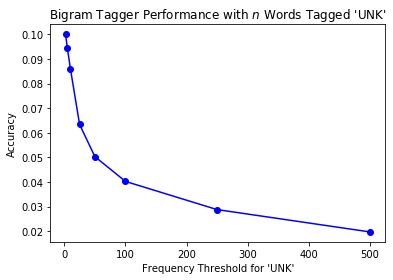

In [246]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

*The results are pretty dreadful: The performance is always worse than the bigram tagger working on unprocessed data (which was pretty bad to begin with), and goes steadily downhill.  Upon reflection, this only makes sense: comparing a modified dataset with an unmodified one is going to generate a lot of inconsistencies.*

*Let's try the same thing, only this time generating our training and test splits from the same preprocessed data set:*

In [243]:
sizes = [2, 5, 10, 25, 50, 100, 150, 200, 250]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

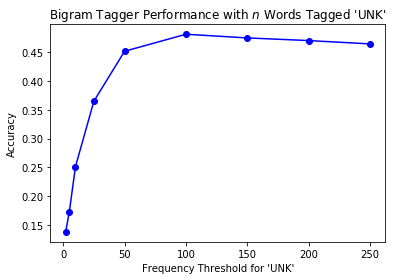

In [244]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

*Here, the tagger does much, much better.  If we replace words that occur less than 100 times with 'UNK', the performance of our bigram tagger goes up to nearly 50%, which is considerably better than the approximately 10% it got correct in the beginning.  However, the question now is what percentage of our vocabulary is being replaced by 'UNK'?*

In [252]:
less_than_100 = 0

for _, v in new_freq.items():
    if v <= 100:
        less_than_100 += 1
        
less_than_100

13029

In [253]:
less_than_100/len(new_freq)

0.9936699206833435

*So, to get our high evaluation figures, we've had to replace virtually all of the word types with 'UNK'.  No wonder the tagger is doing so well.  Clearly, accuracy isn't the only thing we should be concerned with.*

*Now, let's repeat the experiment with backoff taggers.  As above, I'll train and test the tagger using respectively a preprocessed and unprocessed data set:*

In [273]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)  
    
    perfs.append(t2.evaluate(test))

In [274]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs2 = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

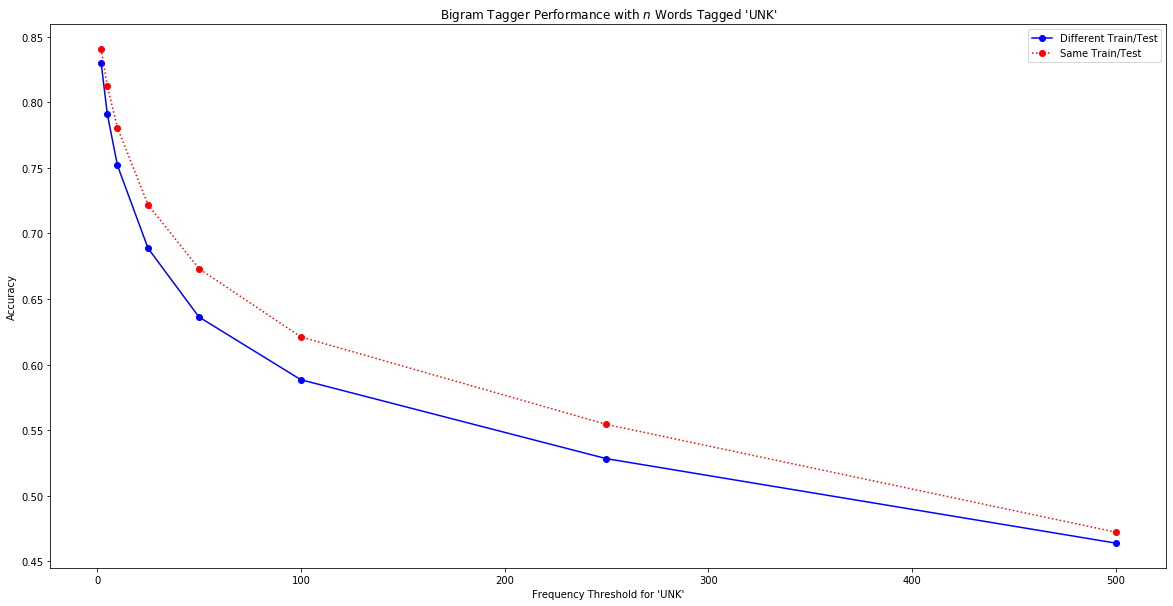

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

*The plots appear to be very similar.  Let's try again, with smaller numbers for $n$, the threshold at which we replace words with 'UNK':*

In [265]:
import numpy as np

sizes = np.arange(2, 21)
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)  
    
    perfs.append(t2.evaluate(test))

In [266]:
sizes = np.arange(2, 21)
perfs2 = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

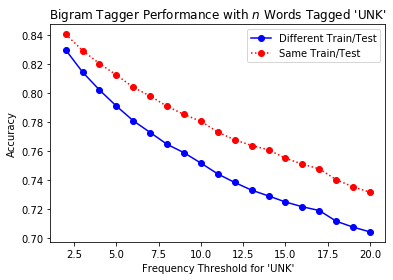

In [268]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

*To answer the second part of the question: the backoff taggers are only utilized when the bigram tagger fails to find a tag for a given bigram.  Since this happens less often when part of the corpus is converted to 'UNK', these backoff taggers are used less frequently.*

##### 31. 

Modify the program in [4.1](https://www.nltk.org/book/ch05.html#code-baseline-tagger) to use a logarithmic scale on the x-axis, by replacing `pylab.plot()` with `pylab.semilogx()`. What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

In [287]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, 
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

import matplotlib.pyplot as plt
import numpy as np

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    # replacing plt.plot with plt.semilogx
    plt.semilogx(sizes, perfs, '-bo')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.show()
    
    

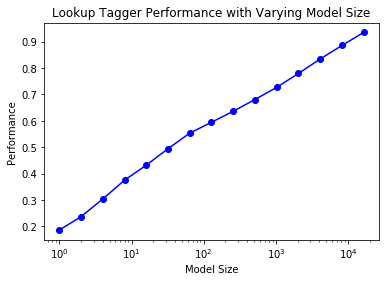

In [288]:
display()

*The resulting plot is nearly a straight line, which is strong evidence of a definite power relationship.*

##### 32. 

◑ Consult the documentation for the Brill tagger demo function, using `help(nltk.tag.brill.demo)`. Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?

*It appears that the Brill tagger, and its accompanying documentation, have moved:*

```
help(nltk.tag.brill.demo)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-298-f86fe87259a4> in <module>
----> 1 help(nltk.tag.brill.demo)

AttributeError: module 'nltk.tag.brill' has no attribute 'demo'
    
    
```

*Since this isn't working, there's no way I can complete the question.  However, instead of just moving on, I'll try to spend a little time with the Brill Tagger, as it was sort of glossed over in the book. The code below is (mostly) from the docs for [nltk.tag](http://www.nltk.org/api/nltk.tag.html?highlight=train%20brill%20tagger#module-nltk.tag.brill_trainer "Brill Trainer").  I still feel like I'm just toying around with the Brill Trainer, so it might be worthwhile to come back to this later.*

In [309]:
# from http://www.nltk.org/api/nltk.tag.html?highlight=train%20brill%20tagger#nltk.tag.brill_trainer.BrillTaggerTrainer.train


#imports 
from nltk.tbl.template import Template 
from nltk.tag.brill import Pos, Word 
from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer

#some data 
from nltk.corpus import treebank 
training_data = treebank.tagged_sents()[:100] 
baseline_data = treebank.tagged_sents()[100:200] 
gold_data = treebank.tagged_sents()[200:300] 
testing_data = [untag(s) for s in gold_data]

backoff = RegexpTagger([
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
     (r'(The|the|A|a|An|an)$', 'AT'),   # articles
     (r'.*able$', 'JJ'),                # adjectives
     (r'.*ness$', 'NN'),                # nouns formed from adjectives
     (r'.*ly$', 'RB'),                  # adverbs
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # past tense verbs
     (r'.*', 'NN')                      # nouns (default)
     ])

In [310]:
baseline = backoff
baseline.evaluate(gold_data)

0.245014245014245

In [332]:
#templates 
Template._cleartemplates() 

#clear any templates created in earlier tests 
templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

#construct a BrillTaggerTrainer 
tt = BrillTaggerTrainer(baseline, templates, trace=3)

tagger1 = tt.train(training_data, max_rules=10)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
  85  85   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  47  63  16 161  | NN->IN if Pos:NNS@[-1]
  33  33   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  26  26   0   0  | IN->. if Pos:NNS@[-1] & Word:.@[0]
  24  24   0   0  | IN->, if Pos:NNS@[-1] & Word:,@[0]
  22  27   5  24  | NN->-NONE- if Pos:VBD@[-1]
  17  

In [312]:
tagger1.rules()[1:3]

(Rule('001', 'NN', ',', [(Pos([-1]),'NN'), (Word([0]),',')]),
 Rule('001', 'NN', '.', [(Pos([-1]),'NN'), (Word([0]),'.')]))

In [328]:
train_stats = tagger1.train_stats()

In [329]:
[train_stats[stat] for stat in ['initialerrors', 'finalerrors', 'rulescores']]

[1775,
 1091,
 [132,
  85,
  69,
  51,
  47,
  33,
  26,
  24,
  22,
  17,
  17,
  16,
  16,
  15,
  15,
  14,
  13,
  12,
  10,
  9,
  9,
  8,
  8,
  8,
  8]]

In [330]:
tagger1.print_template_statistics(printunused = False)

TEMPLATE STATISTICS (TRAIN)  2 templates, 25 rules)
TRAIN (   2417 tokens) initial  1775 0.2656 final:  1091 0.5486 
#ID | Score (train) |  #Rules     | Template
--------------------------------------------
001 |   429   0.627 |  17   0.680 | Template(Pos([-1]),Word([0]))
000 |   255   0.373 |   8   0.320 | Template(Pos([-1]))




In [331]:
tagger1.evaluate(gold_data)

0.5042735042735043

In [318]:
tagged, test_stats = tagger1.batch_tag_incremental(testing_data, gold_data)

In [319]:
tagged[33][12:] == [('foreign', 'IN'), ('debt', 'NN'), ('of', 'IN'), ('$', 'NN'), ('64', 'CD'),
     ('billion', 'NN'), ('*U*', 'NN'), ('--', 'NN'), ('the', 'DT'), ('third-highest', 'NN'), ('in', 'NN'),
     ('the', 'DT'), ('developing', 'VBG'), ('world', 'NN'), ('.', '.')]

True

In [320]:
[test_stats[stat] for stat in ['initialerrors', 'finalerrors', 'rulescores']]

[1855, 1376, [100, 85, 67, 58, 27, 36, 27, 16, 31, 32]]

In [321]:
# a high-accuracy tagger 
tagger2 = tt.train(training_data, max_rules=10, min_acc=0.99)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: 0.99)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
  85  85   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  36  36   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  26  26   0   0  | NN->. if Pos:NNS@[-1] & Word:.@[0]
  24  24   0   0  | NN->, if Pos:NNS@[-1] & Word:,@[0]
  19  19   0   6  | NN->VB if Pos:TO@[-1]
  18  18   0   0  | CD->-NONE- if Pos:NN@[-1] & Word:0

In [322]:
tagger2.evaluate(gold_data)

0.4415954415954416

In [323]:
tagger2.rules()[2:4]

(Rule('001', 'NN', '.', [(Pos([-1]),'NN'), (Word([0]),'.')]),
 Rule('001', 'NN', 'IN', [(Pos([-1]),'NN'), (Word([0]),'of')]))

*I used this `for`-loop to try the BrillTagger with an ever-increasing number of rules.  The rules do take some time to calculate (about two minutes to go through the complete iteration of 50 cycles); but the templates are being cleared out each time, so perhaps it would be faster to keep the old templates and just add one new rule?  There also appears to be no way of preventing the rules from being printed.*

In [335]:
rules = np.arange(1, 51)

perfs = []

for r in rules:

    #templates 
    Template._cleartemplates() 

    #clear any templates created in earlier tests 
    templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

    #construct a BrillTaggerTrainer 
    tt = BrillTaggerTrainer(baseline, templates, trace=3)

    tagger1 = tt.train(training_data, max_rules = r)
    perfs.append(tagger1.evaluate(gold_data))

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> in

*We when plot the results, we can see that performance is steadily increasing, although it begins to plateau at about 30-40 rules.*

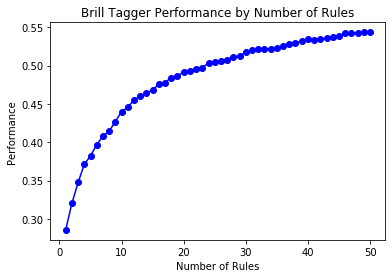

In [336]:
plt.plot(rules, perfs, '-bo')
plt.title("Brill Tagger Performance by Number of Rules")
plt.xlabel("Number of Rules")
plt.ylabel('Performance')
plt.show()

##### 33.

◑ Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. $\text{word}_i$ → $\text{tag}_i$ → $\text{tag}_{i+1}$.

In [347]:
set(list(nltk.bigrams([tagset[1] for tagset in brown.tagged_sents(tagset = 'universal')[0]])))

{('.', 'ADP'),
 ('.', 'DET'),
 ('ADJ', 'NOUN'),
 ('ADP', 'DET'),
 ('ADP', 'NOUN'),
 ('DET', 'NOUN'),
 ('NOUN', '.'),
 ('NOUN', 'ADJ'),
 ('NOUN', 'ADP'),
 ('NOUN', 'DET'),
 ('NOUN', 'NOUN'),
 ('NOUN', 'VERB'),
 ('VERB', '.'),
 ('VERB', 'NOUN')}

In [351]:
tag_plus = []

bts = brown.tagged_sents(tagset = 'universal')
for i in range(len(bts[0]) - 1):
    tag_plus.append((bts[0][i][0].lower(), bts[0][i][1], bts[0][i + 1][1]))
    

In [352]:
tag_plus

[('the', 'DET', 'NOUN'),
 ('fulton', 'NOUN', 'NOUN'),
 ('county', 'NOUN', 'ADJ'),
 ('grand', 'ADJ', 'NOUN'),
 ('jury', 'NOUN', 'VERB'),
 ('said', 'VERB', 'NOUN'),
 ('friday', 'NOUN', 'DET'),
 ('an', 'DET', 'NOUN'),
 ('investigation', 'NOUN', 'ADP'),
 ('of', 'ADP', 'NOUN'),
 ("atlanta's", 'NOUN', 'ADJ'),
 ('recent', 'ADJ', 'NOUN'),
 ('primary', 'NOUN', 'NOUN'),
 ('election', 'NOUN', 'VERB'),
 ('produced', 'VERB', '.'),
 ('``', '.', 'DET'),
 ('no', 'DET', 'NOUN'),
 ('evidence', 'NOUN', '.'),
 ("''", '.', 'ADP'),
 ('that', 'ADP', 'DET'),
 ('any', 'DET', 'NOUN'),
 ('irregularities', 'NOUN', 'VERB'),
 ('took', 'VERB', 'NOUN'),
 ('place', 'NOUN', '.')]